In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
!unzip '17810_23812_bundle_archive.zip' -d

Archive:  17810_23812_bundle_archive.zip
  inflating: chest_xray/__MACOSX/._chest_xray  
  inflating: chest_xray/__MACOSX/chest_xray/._.DS_Store  
  inflating: chest_xray/__MACOSX/chest_xray/._test  
  inflating: chest_xray/__MACOSX/chest_xray/._train  
  inflating: chest_xray/__MACOSX/chest_xray/test/._.DS_Store  
  inflating: chest_xray/__MACOSX/chest_xray/test/._NORMAL  
  inflating: chest_xray/__MACOSX/chest_xray/test/._PNEUMONIA  
  inflating: chest_xray/__MACOSX/chest_xray/test/NORMAL/._IM-0001-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/test/NORMAL/._IM-0003-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/test/NORMAL/._IM-0005-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/test/NORMAL/._IM-0006-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/test/NORMAL/._IM-0007-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/test/NORMAL/._IM-0009-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/test/NORMAL/._IM-0010-0001.jpeg  
  inflating: c

In [5]:
import keras
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [59]:
import tensorflow as tf

In [95]:
print(tensorflow.__version__)

2.2.0


In [6]:
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

### Instantiating the ImageDataGenerator for training and test datasets.

In [7]:
train_datagen = ImageDataGenerator(rescale=1.0/255, 
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1.0/255)

### Defining training and test sets with data generators.

In [9]:
training_set = train_datagen.flow_from_directory('data/chest_xray/train',
                                               target_size=(64,64),
                                               batch_size=32,
                                               class_mode='binary')
test_set = test_datagen.flow_from_directory('data/chest_xray/test',
                                           target_size=(64,64),
                                           batch_size=32,
                                           class_mode='binary')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


#### First baseline model with one convolution2d layer and one maxpooling2d layer.

In [62]:
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix

In [ ]:
predictions = model.predict_generator(test_set, steps=len(test_set), verbose=1)
predicted_classes = np.argmax(predictions, axis=1)

true_classes = test_set.classes
class_labels = list(test_set.class_indices.keys())

report = classification_report(true_classes, predictions, target_names=class_labels)
print(report)

In [46]:
train_images, train_labels = next(training_set)
test_images, test_labels = next(test_set)

train_img = train_images.reshape(train_images.shape[0], -1)
test_img = test_images.reshape(test_images.shape[0], -1)



In [50]:
model = Sequential()
model.add(Convolution2D(32, (3,3), input_shape=(64,64,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(units=85, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit_generator(training_set, epochs=32, validation_data=(test_set))

Epoch 1/32
163/163 [==============================] - 60s 369ms/step - loss: 0.4293 - accuracy: 0.8380 - val_loss: 0.3438 - val_accuracy: 0.8125
Epoch 2/32
163/163 [==============================] - 58s 359ms/step - loss: 0.2327 - accuracy: 0.9072 - val_loss: 0.2057 - val_accuracy: 0.8718
Epoch 3/32
163/163 [==============================] - 59s 364ms/step - loss: 0.2017 - accuracy: 0.9170 - val_loss: 0.2835 - val_accuracy: 0.8462
Epoch 4/32
163/163 [==============================] - 60s 368ms/step - loss: 0.1901 - accuracy: 0.9237 - val_loss: 0.1103 - val_accuracy: 0.8654
Epoch 5/32
163/163 [==============================] - 59s 361ms/step - loss: 0.1688 - accuracy: 0.9350 - val_loss: 1.1714 - val_accuracy: 0.8574
Epoch 6/32
163/163 [==============================] - 56s 346ms/step - loss: 0.1648 - accuracy: 0.9383 - val_loss: 0.6691 - val_accuracy: 0.8205
Epoch 7/32
163/163 [==============================] - 55s 339ms/step - loss: 0.1594 - accuracy: 0.9396 - val_loss: 0.7190 - val_ac

In [18]:
acc = model.evaluate_generator(test_set, steps=len(test_set), verbose=1)
list(zip(model.metrics_names, acc))

20/20 [==============================] - 5s 257ms/step


[('loss', 0.03866893798112869), ('accuracy', 0.8717948794364929)]

In [51]:
def show_img(train_images, train_labels):
    plt.figure(figsize=(12,12))
    for i in range(25):
        ax = plt.subplot(5,5,i+1)
        plt.imshow(train_images[i])
        if train_labels[i]:
            plt.title('PNEUMONIA')
        else:
            plt.title('NORMAL')
        plt.axis('off')

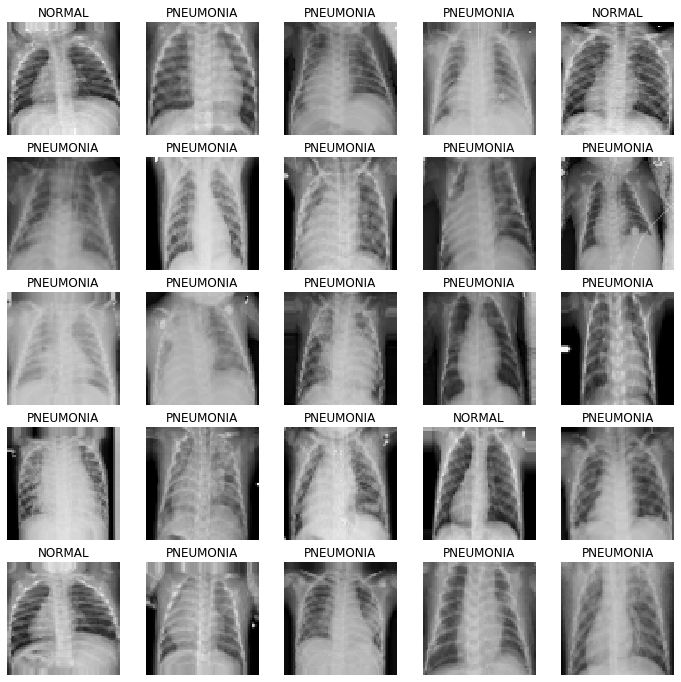

In [52]:
show_img(np.array(train_images), np.array(train_labels))

### Group parameters for train and test data generators

In [55]:
train_datagen = keras.preprocessing.image.ImageDataGenerator(horizontal_flip=True, 
                                                             zoom_range=0.2,
                                                             rescale=1./225)
val_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./225)
test_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./225)
train_data = train_datagen.flow_from_directory('data/chest_xray/train/',
                                               target_size=(100,100),
                                               batch_size=32,
                                               class_mode='binary',
                                               color_mode='grayscale')
val_data = val_datagen.flow_from_directory('data/chest_xray/val/',
                                               target_size=(100,100),
                                               batch_size=32,
                                               class_mode='binary',
                                               color_mode='grayscale')
test_data = test_datagen.flow_from_directory('data/chest_xray/test//',
                                             target_size=(100,100),
                                             batch_size=32,
                                             class_mode='binary',
                                             color_mode='grayscale')

Found 5216 images belonging to 2 classes.
Found 24 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [61]:
METRICS = [
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]

In [60]:
model = Sequential()
model.add(Convolution2D(32, (3,3), input_shape=(100,100,1), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(units=85, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ])

history = model.fit(train_data, epochs=20, validation_data=(val_data))

Epoch 1/20
163/163 [==============================] - 56s 342ms/step - loss: 0.4715 - accuracy: 0.8000 - precision: 0.7513 - recall: 0.9446 - val_loss: 0.3880 - val_accuracy: 0.8750 - val_precision: 0.8080 - val_recall: 0.9591
Epoch 2/20
163/163 [==============================] - 56s 347ms/step - loss: 0.2659 - accuracy: 0.8894 - precision: 0.8329 - recall: 0.9540 - val_loss: 0.4014 - val_accuracy: 0.8333 - val_precision: 0.8544 - val_recall: 0.9534
Epoch 3/20
163/163 [==============================] - 56s 345ms/step - loss: 0.2200 - accuracy: 0.9124 - precision: 0.8677 - recall: 0.9536 - val_loss: 0.3424 - val_accuracy: 0.8750 - val_precision: 0.8781 - val_recall: 0.9537
Epoch 4/20
163/163 [==============================] - 56s 344ms/step - loss: 0.2203 - accuracy: 0.9114 - precision: 0.8845 - recall: 0.9530 - val_loss: 0.3667 - val_accuracy: 0.8750 - val_precision: 0.8904 - val_recall: 0.9534
Epoch 5/20
163/163 [==============================] - 57s 349ms/step - loss: 0.1955 - accura

In [102]:
acc = model.evaluate_generator(test_data, steps=len(test_set), verbose=1)
list(zip(model.metrics_names, acc))

20/20 [==============================] - 4s 192ms/step


[('loss', 0.4157674014568329),
 ('accuracy', 0.8958333134651184),
 ('precision', 0.9404488801956177),
 ('recall', 0.9638503193855286)]

In [72]:
type(test_data)

keras.preprocessing.image.DirectoryIterator

In [113]:
first_batch = test_data.next()
data_list = first_batch[0]
batch_index = 0
class_list = first_batch[1]
while batch_index <= test_data.batch_index:
    data = test_data.next()
    print(data[0].shape)
    data_list=np.concatenate((data_list, data[0]))
    class_list=np.concatenate((class_list, data[1]))
    batch_index = batch_index + 1
data_array = np.asarray(data_list)
data_array.shape

(32, 100, 100, 1)
(32, 100, 100, 1)
(32, 100, 100, 1)
(32, 100, 100, 1)
(32, 100, 100, 1)
(32, 100, 100, 1)
(32, 100, 100, 1)
(32, 100, 100, 1)
(32, 100, 100, 1)
(32, 100, 100, 1)
(32, 100, 100, 1)
(32, 100, 100, 1)
(32, 100, 100, 1)
(32, 100, 100, 1)
(32, 100, 100, 1)
(32, 100, 100, 1)
(32, 100, 100, 1)
(32, 100, 100, 1)
(16, 100, 100, 1)


(624, 100, 100, 1)

In [120]:
from sklearn.metrics import precision_score, recall_score, accuracy_score
def evaluation(y, y_hat, title = 'Confusion Matrix'):
    '''takes in true values and predicted values.
    The function then prints out a classifcation report
    as well as a confusion matrix using seaborn's heatmap.'''
    cm = confusion_matrix(y, y_hat)
    precision = precision_score(y, y_hat)
    recall = recall_score(y, y_hat)
    accuracy = accuracy_score(y,y_hat)
    print(classification_report(y, y_hat, target_names=['NORMAL', 'PNEUMONIA']))
    print('Accurancy: ', accuracy)
    sns.heatmap(cm,  cmap= 'Greens', annot=True)
    plt.xlabel('predicted')
    plt.ylabel('actual')
    plt.title(title)
    plt.show()

In [122]:
preds = model.predict_classes(data_array)

              precision    recall  f1-score   support

      NORMAL       0.93      0.78      0.85       234
   PNEUMONIA       0.88      0.97      0.92       390

    accuracy                           0.90       624
   macro avg       0.91      0.87      0.88       624
weighted avg       0.90      0.90      0.89       624

Accurancy:  0.8958333333333334


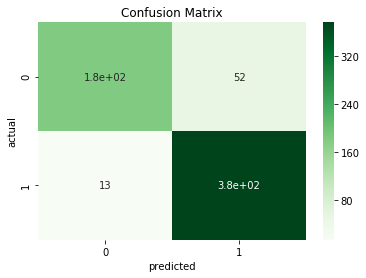

In [141]:
evaluation(class_list, preds)

In [146]:
pip install keras_utils

  Created wheel for keras-utils: filename=keras_utils-1.0.13-py3-none-any.whl size=2655 sha256=8bbbfcdfe7d273a3b3488b96418227a177aa13c2ab972503fe2ba996582950a5
  Stored in directory: /Users/JasonWong/Library/Caches/pip/wheels/5e/2a/9f/349ca7e8f686c62b35d549feb5c9a286c409bfa0020aefde87
Successfully built keras-utils
Note: you may need to restart the kernel to use updated packages.
